In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("audiobook_features.csv")
print("Dataset shape:",df.shape)

Dataset shape: (14084, 19)


In [5]:
X = df.drop(columns=["Target"])
y = df["Target"]

In [6]:
print("Features shape:",X.shape)
print("Target shape:",y.shape)

Features shape: (14084, 18)
Target shape: (14084,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [9]:
print("Train set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Train set size: (11267, 18) (11267,)
Test set size: (2817, 18) (2817,)


In [10]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


print("Train/Test sets saved : X_train.csv, X_test.csv, y_train.csv, y_test.csv")

Train/Test sets saved : X_train.csv, X_test.csv, y_train.csv, y_test.csv


In [12]:
# Load the saved splits
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

In [13]:
train_counts = y_train["Target"].value_counts(normalize=True) * 100
test_counts = y_test["Target"].value_counts(normalize=True) * 100

print("Train split churn %:\n", train_counts)
print("\nTest split churn %:\n", test_counts)


Train split churn %:
 Target
0    84.112896
1    15.887104
Name: proportion, dtype: float64

Test split churn %:
 Target
0    84.132055
1    15.867945
Name: proportion, dtype: float64


In [14]:
# Combine into a DataFrame for visualization
balance_df = pd.DataFrame({
    "Train": train_counts,
    "Test": test_counts
})

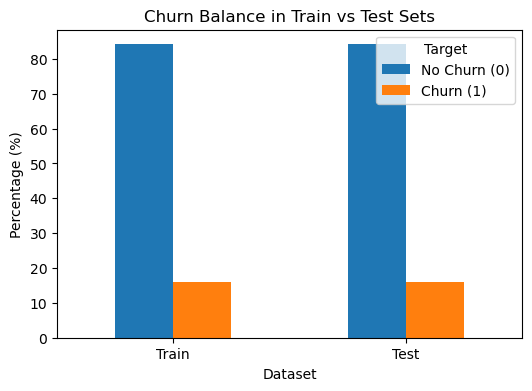

In [15]:

# Plot side-by-side
balance_df.T.plot(kind="bar", figsize=(6,4))
plt.title("Churn Balance in Train vs Test Sets")
plt.ylabel("Percentage (%)")
plt.xlabel("Dataset")
plt.xticks(rotation=0)
plt.legend(title="Target", labels=["No Churn (0)", "Churn (1)"])
plt.show()